In [1]:
# regression

In [2]:
from sklearn.model_selection import train_test_split  # train_test_split 
from sklearn.preprocessing import MinMaxScaler     

In [3]:
import warnings #
from collections import OrderedDict #
import pandas as pd
import numpy as np
warnings.filterwarnings('ignore')

In [4]:
#建立資料並檢視資料
examDict={'time':list(np.arange(0.5,5.5,0.25)),
          'score':[10,  22,  13,  43,  20,  22,  33,  50,  62,  
              48,  55,  75,  62,  73,  81,  76,  64,  82,  90,  93]}
examOrderedDict=OrderedDict(examDict)
examDf=pd.DataFrame(examOrderedDict)
examDf

,time,score
0,0.50,10
1,0.75,22
2,1.00,13
3,1.25,43
4,1.50,20
5,1.75,22
6,2.00,33
7,2.25,50
8,2.50,62
9,2.75,48


In [5]:
examDf.head()

,time,score
0,0.50,10
1,0.75,22
2,1.00,13
3,1.25,43
4,1.50,20


In [6]:
#檢視資料描述統計資訊
examDf.describe()

,time,score
count,20.00000,20.000000
mean,2.87500,53.700000
std,1.47902,26.435821
min,0.50000,10.000000
25%,1.68750,30.250000
50%,2.87500,58.500000
75%,4.06250,75.250000
max,5.25000,93.000000


In [7]:
import matplotlib.pyplot as plt

(array([2., 3., 1., 1., 2., 1., 3., 3., 2., 2.]),
 array([10. , 18.3, 26.6, 34.9, 43.2, 51.5, 59.8, 68.1, 76.4, 84.7, 93. ]),
 <a list of 10 Patch objects>)

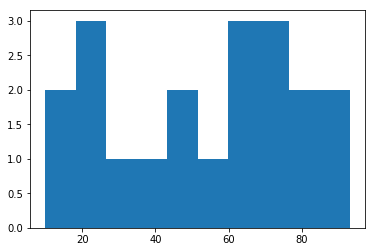

In [8]:
dis=examDf["score"]
plt.hist(dis,bins=10)

In [9]:
import seaborn as sns
sns.set()

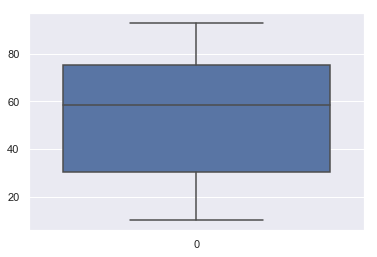

In [10]:
sns.boxplot(data = examDf['score'])

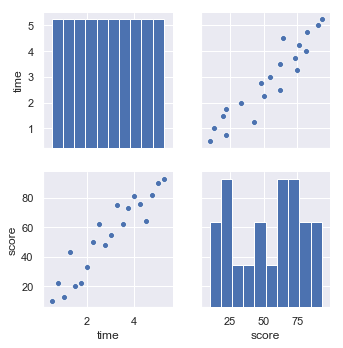

In [11]:
plt = sns.pairplot(data = examDf)

In [12]:
exam_X=examDf['time']
exam_y=examDf['score']

No handles with labels found to put in legend.


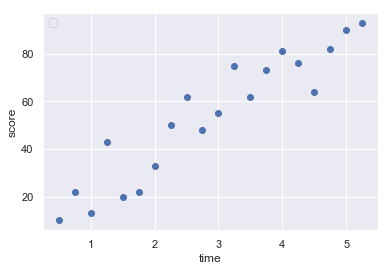

In [13]:
import matplotlib.pyplot as plt

#橫縱軸標籤
plt.legend(loc=2)
plt.xlabel('time')
plt.ylabel('score')
#散點圖
plt.scatter(exam_X,exam_y,color='b',label='learn_data')


In [14]:
#變數間的相關係數
DfC=examDf.corr()
print(DfC)

         time   score
time   1.0000  0.9379
score  0.9379  1.0000


In [15]:
# 建立訓練集和測試集資料
train_X,test_X,train_y,test_y =train_test_split(exam_X,exam_y,train_size=0.8)

# 輸出訓練集和測試集資料大小
print('訓練集大小',train_X.shape,train_y.shape)
print('測試集大小',test_X.shape,test_y.shape)

訓練集大小 (16,) (16,)
測試集大小 (4,) (4,)


In [16]:
#匯入線性迴歸模型
from sklearn.linear_model import LinearRegression
#建立模型
model=LinearRegression()

In [17]:
# 匯入模型的資料轉換
train_X=train_X.values.reshape(-1,1)  #
train_y=train_y.values.reshape(-1,1)
test_X=test_X.values.reshape(-1,1)
test_y=test_y.values.reshape(-1,1)
print('訓練集大小',train_X.shape,train_y.shape)
print('測試集大小',test_X.shape,test_y.shape)
model.fit(train_X,train_y)


訓練集大小 (16, 1) (16, 1)
測試集大小 (4, 1) (4, 1)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
# 檢視模型得分
print('模型得分為',round(model.score(test_X,test_y),4))


模型得分為 0.9835


模型的迴歸方程是:y=7.681412+16.203294 x


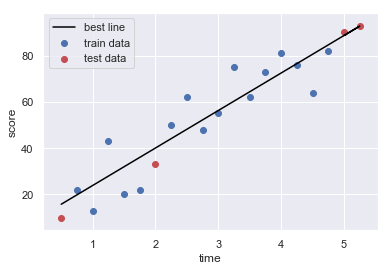

In [19]:
#模型擬合線（模型的迴歸方程）y=a+bx
a=model.intercept_
b=model.coef_
print('模型的迴歸方程是:y=%f+%f x'%(a,b))

#繪製擬合曲線
plt.scatter(train_X,train_y,color='b',label='train data')
test_y_pred=model.predict(test_X)
plt.plot(test_X,test_y_pred,color='black',label='best line')

#測試集資料的散點圖
plt.scatter(test_X,test_y,color='r',label='test data')

#座標軸
plt.xlabel('time')
plt.ylabel('score')
plt.legend(loc=2)
plt.show()